<a href="https://colab.research.google.com/github/zeynepsenak/Stockprediction-CNN-RNN-/blob/master/CNN_STOCKPREDICTION(np).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#CNN - Stock Prediction 
import numpy as np
import os
import pandas_datareader as web
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
import cv2
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation 
from keras import regularizers
plt.style.use('fivethirtyeight')

In [22]:
#x_train-images Folder
dirName = 'xtr_img'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")


Directory  xtr_img  already exists


In [23]:
#x_test-images Folder
dirName = 'xtest_img'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")

Directory  xtest_img  already exists


In [24]:
df = web.DataReader('AAPL', data_source='yahoo', start='2004-01-01', end='2020-01-01') 
def loaddata():
    #Visualizieren die Schlusspreisverlauff
    plt.figure(figsize=(16,8))
    plt.title('_Schlusspreisverlauf_')
    plt.plot(df['Close'])
    plt.xlabel('Datum',fontsize=18)
    plt.ylabel('Schlusspreis USD ($)',fontsize=18)
    plt.show()

In [25]:
#x_train (img)
def convert_img(path,xtrainzahl, imgname): #3102-0
  img = Image.fromarray(prex_train[xtrainzahl], 'RGB')
  img.save(path + imgname)
  if(i%100==0):
    print(str(xtrainzahl) + 'ist fertig')

In [26]:
#x_test (img)
def testconvert_img(path, xtestzahl, imgname): #3161-4027
  img = Image.fromarray(prex_test[xtestzahl], 'RGB')
  img.save(path + imgname)
  if(i%100==0):
    print(str(xtestzahl) + 'ist fertig')

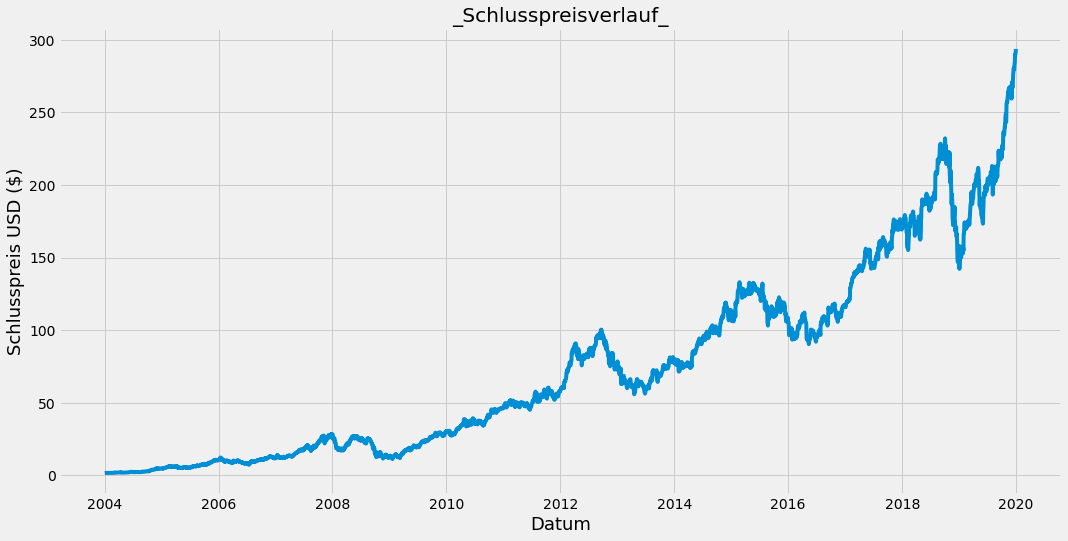

In [27]:
loaddata()

In [28]:
data_cl = df.filter(['Close']) #Schluss (Close) Column von Daten : data_cl
clset = data_cl.values #numpy array - data_cl : cl_set
data_op = df.filter(['Open']) #Öffnüng (Open) Column von Daten : data_op
opset = data_op.values #numpy array - data_op : op_set
data_vol = df.filter(['Volume']) #Volumen (Volume) Column von Daten : data_vol
volset = data_vol.values #numpy array - data_vol : vol_set

# len(clset) : 4027

training_data_len = math.ceil( len(clset) *.8) #Train Reiheanzahl

training_data_len

3222

In [29]:
#Skalierung zwischen 0-1 
sc = MinMaxScaler(feature_range=(0, 1)) 
sc_data = sc.fit_transform(clset)

sc_data.shape

(4027, 1)

In [30]:
train_data = sc_data[0:training_data_len  , : ] #scaliertes trainingsset

#Data teilen: prex_train-y_train, prex_test-y_test 
prex_train=[]
y_train=[]

#121. günün kapanış fiyatını tahmin etmek için önceki 120 günlük veri seti

for i in range(120,len(train_data)):
    prex_train.append(train_data[i-120:i, 0]) 
    y_train.append(train_data[i, 0])

prex_train = np.array(prex_train)

In [31]:
prex_train = np.asarray(prex_train.reshape(3102,12,10))
prex_train.shape

(3102, 12, 10)

In [32]:
#0-999 train img create:
for i in range(0, 999):
  path = 'xtr_img/'
  xtrainzahl = i
  imgname = 'xtrimg' + str(i) + '.png'
  convert_img(path,xtrainzahl, imgname)

0ist fertig
100ist fertig
200ist fertig
300ist fertig
400ist fertig
500ist fertig
600ist fertig
700ist fertig
800ist fertig
900ist fertig


In [33]:
#999-1999 train img create:
for i in range(999, 1999):
  path = 'xtr_img/'
  xtrainzahl = i
  imgname = 'xtrimg' + str(i) + '.png'
  convert_img(path, xtrainzahl, imgname)

1000ist fertig
1100ist fertig
1200ist fertig
1300ist fertig
1400ist fertig
1500ist fertig
1600ist fertig
1700ist fertig
1800ist fertig
1900ist fertig


In [34]:
#1999-3102 train img create:
for i in range(1999, 3102):
  path = 'xtr_img/'
  xtrainzahl = i
  imgname = 'xtrimg' + str(i) + '.png'
  convert_img(path, xtrainzahl, imgname)

2000ist fertig
2100ist fertig
2200ist fertig
2300ist fertig
2400ist fertig
2500ist fertig
2600ist fertig
2700ist fertig
2800ist fertig
2900ist fertig
3000ist fertig
3100ist fertig


In [35]:
x_train = []
xtrlabels = []
def xTrainProcess(path):
  p = 0
  x = 0
  images = [f for f in os.listdir(path)]
  for iname in images:
    images = str(path + '/' + iname)
    img = cv2.imread(images, cv2.IMREAD_COLOR)
    x_train.append(img)
    xtrlabels.append(x)
    x = x+1
    p = p+1

    if(p%100==0):
      print(str(p) + ' ist fertig')

In [36]:
path = '/content/xtr_img'
xTrainProcess(path)

100 ist fertig
200 ist fertig
300 ist fertig
400 ist fertig
500 ist fertig
600 ist fertig
700 ist fertig
800 ist fertig
900 ist fertig
1000 ist fertig
1100 ist fertig
1200 ist fertig
1300 ist fertig
1400 ist fertig
1500 ist fertig
1600 ist fertig
1700 ist fertig
1800 ist fertig
1900 ist fertig
2000 ist fertig
2100 ist fertig
2200 ist fertig
2300 ist fertig
2400 ist fertig
2500 ist fertig
2600 ist fertig
2700 ist fertig
2800 ist fertig
2900 ist fertig
3000 ist fertig
3100 ist fertig


In [104]:
"""
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(12,10,3)))
model.add(MaxPooling2D(pool_size=(3,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.summary()
"""
model = Sequential()

model.add(Conv2D(32, (3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(12,10,3),
                 kernel_regularizer=regularizers.l2(0.01),  #overfiting mitigation
                 activity_regularizer=regularizers.l1(0.01))
)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (1, 1), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (1, 1), padding='same', activation='relu'))
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.summary()



Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_197 (Conv2D)          (None, 12, 10, 32)        896       
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 10, 8, 32)         9248      
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 5, 4, 32)          0         
_________________________________________________________________
dropout_95 (Dropout)         (None, 5, 4, 32)          0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 5, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_96 (Dropout)         (None, 2, 2, 64)        

In [72]:
#Compile => optimizer:adam loss:ortalama kara hatası
model.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
x_train = np.asarray(x_train)

In [91]:
#Train das Modell
model.fit(x_train, y_train, batch_size=4, epochs=25)

Epoch 1/25
3102/3102 [==============================] - 6s 2ms/step - loss: 0.7184
Epoch 2/25
3102/3102 [==============================] - 6s 2ms/step - loss: 0.7169
Epoch 3/25
3102/3102 [==============================] - 6s 2ms/step - loss: 0.7161
Epoch 4/25
3102/3102 [==============================] - 6s 2ms/step - loss: 0.7156
Epoch 5/25
3102/3102 [==============================] - 5s 2ms/step - loss: 0.7155
Epoch 6/25
3102/3102 [==============================] - 6s 2ms/step - loss: 0.7154
Epoch 7/25
3102/3102 [==============================] - 5s 2ms/step - loss: 0.7154
Epoch 8/25
3102/3102 [==============================] - 5s 2ms/step - loss: 0.7154
Epoch 9/25
3102/3102 [==============================] - 5s 2ms/step - loss: 0.7154
Epoch 10/25
3102/3102 [==============================] - 5s 2ms/step - loss: 0.7154
Epoch 11/25
3102/3102 [==============================] - 5s 2ms/step - loss: 0.7154
Epoch 12/25
3102/3102 [==============================] - 6s 2ms/step - loss: 0.7154
E

In [92]:
#Test Daten
test_data = sc_data[training_data_len - 120: , : ]
#prex_test und y_test Daten
xi = 0
prex_test = []
y_test =  clset[training_data_len : , : ]
for i in range(120,len(test_data)):
    prex_test.append(test_data[i-120:i,0])    
    xi = xi + 1

In [93]:
prex_test = np.array(prex_test)
prex_test = np.asarray(prex_test.reshape(805,12,10))
prex_test.shape

(805, 12, 10)

In [94]:
for i in range(0,xi):
  path='xtest_img/'
  xtestzahl = i 
  imgname = 'xtestimg' + str(i) + '.png'
  testconvert_img(path, xtestzahl, imgname)

0ist fertig
100ist fertig
200ist fertig
300ist fertig
400ist fertig
500ist fertig
600ist fertig
700ist fertig
800ist fertig


In [95]:
x_test = []
xtestlabels = []
def xTestProcess(path):
  p = 0
  x = 0
  images = [f for f in os.listdir(path)]
  for iname in images:
    images = str(path + '/' + iname)
    img = cv2.imread(images, cv2.IMREAD_COLOR)
    x_test.append(img)
    xtestlabels.append(x)
    x = x+1
    p = p+1

    if(p%100==0):
      print(str(p) + ' ist fertig')

In [96]:
path = '/content/xtest_img'
xTestProcess(path)

100 ist fertig
200 ist fertig
300 ist fertig
400 ist fertig
500 ist fertig
600 ist fertig
700 ist fertig
800 ist fertig


In [97]:
x_test = np.asarray(x_test)
#Vorhergesagte Preis Werte Model
predictions = model.predict(x_test) 
predictions = sc.inverse_transform(predictions)#Undo Skalierung
x_test.shape

(805, 12, 10, 3)

In [98]:
#RMSE Wert - Perfektion des Modells - (Perfekt:0)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

121.3227335936156

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


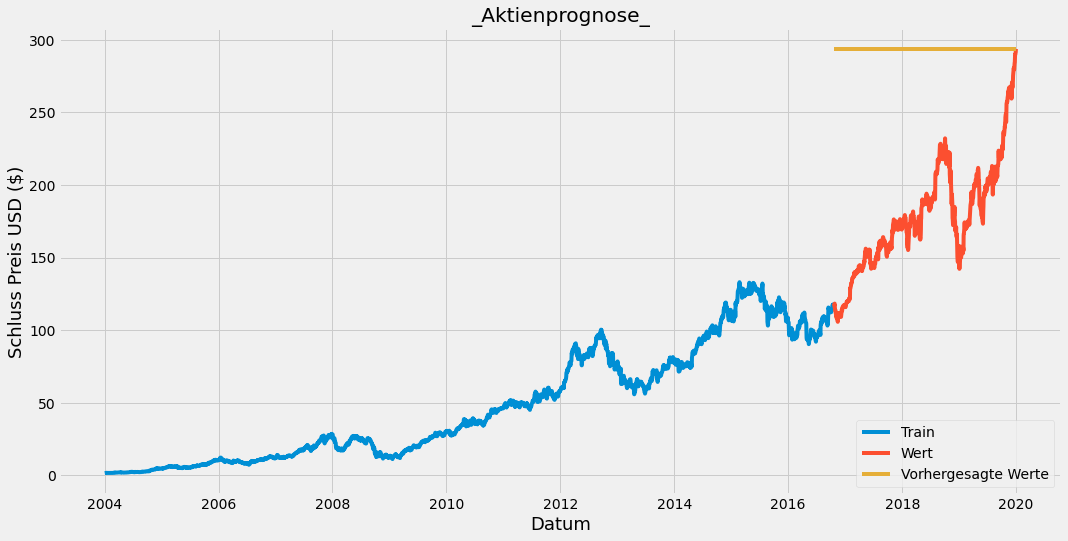

In [99]:
#Plot/Create the data for the graph
train = data_cl[:training_data_len]
valid = data_cl[training_data_len:]
valid['Predictions'] = predictions

#Graph
plt.figure(figsize=(16,8))
plt.title('_Aktienprognose_')
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Schluss Preis USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Wert', 'Vorhergesagte Werte'], loc='lower right')
plt.show()

In [ ]:
#Schluss Werte und vorhergesagte Werte
valid

,Close,Predictions
Date,,
2016-10-19,117.120003,293.649994
2016-10-20,117.059998,293.649994
2016-10-21,116.599998,293.649994
2016-10-24,117.650002,293.649994
2016-10-25,118.250000,293.649994
...,...,...
2019-12-24,284.269989,293.649994
2019-12-26,289.910004,293.649994
2019-12-27,289.799988,293.649994
